In this project, the task was to implement an unsupervised learning algorithm named Winner Takes It All network for clustering. The model is known as a competitive learning model.

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import preprocessing

# Generating clusters

- In this part, I generate three clusters in three regions of unit sphere and three weight vectors in random locations. 
- All of the points and vectors are normalized into unit length.
- You should assign shuffle variable below to True in order to shuffle all 75 data points. Otherwise, the learning algorithm traverses first cluster and then second and so on.

In [2]:
np.set_printoptions(suppress=True) # This prevents scientific notation 

def generate_data(mean=0.9, std_dev=0.1, size=25, shuffle=False):
    # Generate random data with given mean and std_dev values in all axes. Default N(mean=0.9, var=0.01)
    region_1 = std_dev*np.random.randn(size,3) + mean  
    region_1 = preprocessing.normalize(region_1, norm='l2')  # This normalizes into unit length

    region_2 = std_dev*np.random.randn(size,3) - mean
    region_2[:,0] *= -1
    region_2 = preprocessing.normalize(region_2, norm='l2')

    region_3 = std_dev*np.random.randn(size,3) - mean
    region_3[:,1] *= -0.2
    region_3[:,2] *= 0.2
    region_3 = preprocessing.normalize(region_3, norm='l2')

    W = np.random.randn(3,3)
    W = preprocessing.normalize(W, norm='l2')

    X = np.vstack((region_1, region_2))
    X = np.vstack((X, region_3))

    # assign True if you want to shuffle all data points
    if shuffle:
        np.random.shuffle(X)
        
    return X, W, (region_1, region_2, region_3)

In [3]:
X, W, regions = generate_data(shuffle=False)
W_initial = W.copy()

# Plot of clusters and weight vectors

- In this part, I plot the initial configuration. 
- The data is spread out on unit sphere, since all vectors are normalized to unit length (see above function generate_data). Therefore I do not draw the sphere around them for a better visualization. 

<IPython.core.display.Javascript object>


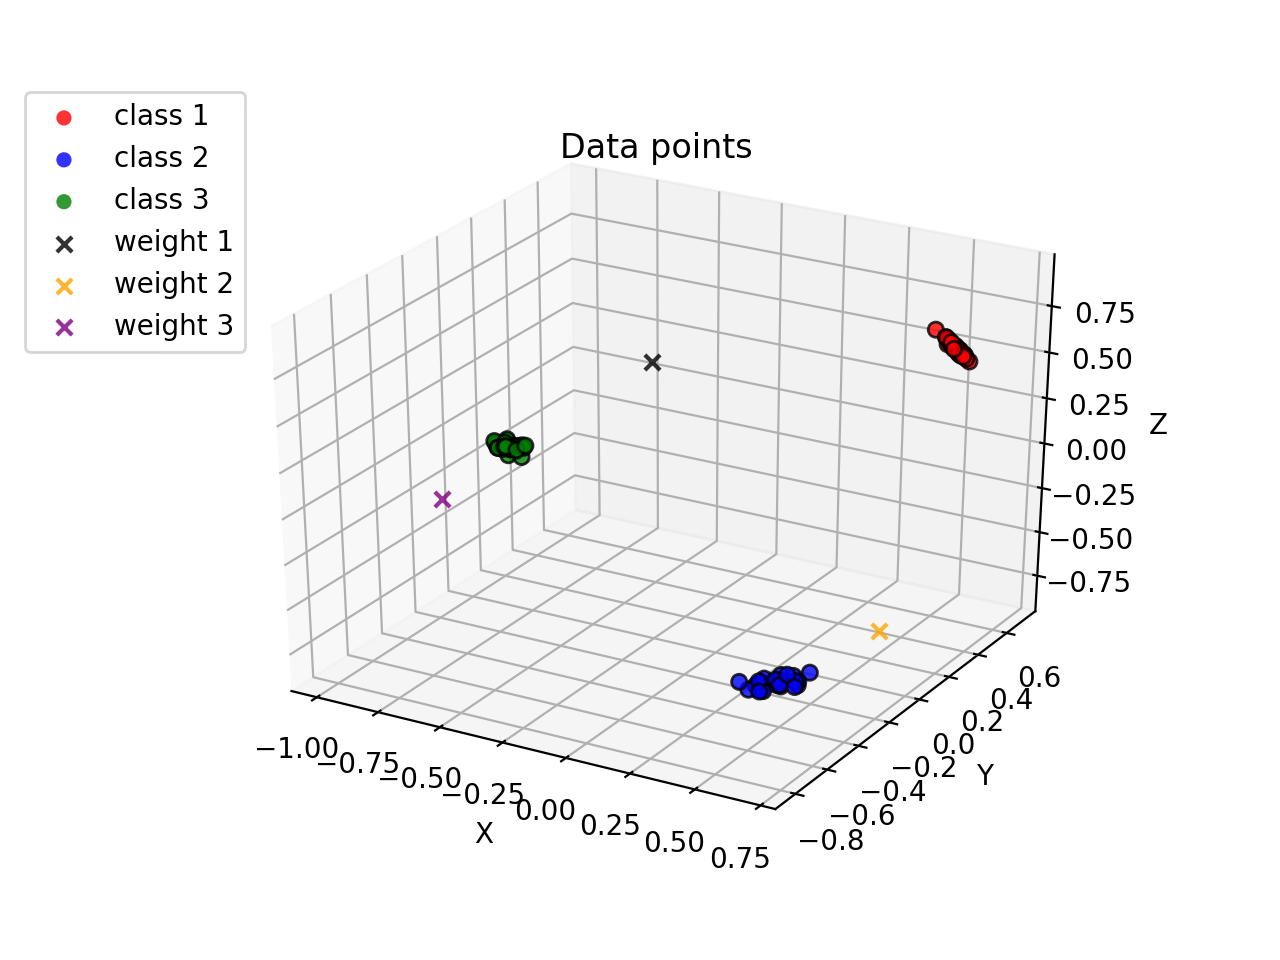

In [6]:
data = regions
colors = ("red", "blue" ,"green")
groups = ("class 1", "class 2", "class 3") 
 
# Create plot
fig = plt.figure()
ax = fig.gca(projection='3d')

for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:,0], data[:,1], data[:,2],alpha=0.8, c=color, edgecolors='none', s=30, label=group)

weights = (W[0], W[1], W[2])
colors = ("black", "orange" ,"purple")
groups = ("weight 1", "weight 2", "weight 3") 
for weight, color, group in zip(weights, colors, groups):
    ax.scatter(weight[0], weight[1], weight[2] ,alpha=0.8, c=color, marker='x',edgecolors='none', s=30, label=group)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Data points')
plt.legend(bbox_to_anchor=(0.1, 1.05))
plt.savefig('initial.png')
plt.show()

# Learning

- For a single data point $\zeta^{j}$, the closest weight vector $w_{i^*}$ is found. This winner weight is updated via the following formula:

\begin{equation}
    w_{i^{*}} = w_{i^{*}} + \eta(\zeta^{j}-w_{i^{*}})
\end{equation}

In [7]:
learning_rate = 0.5  # eta value, you may change it to see different results
W_path = [W[0].copy(), W[1].copy(), W[2].copy()]

# Learning takes place here
for x in X:
    distances = np.array([np.linalg.norm(x-w) for w in W])
    inds  = distances.argsort()
    closest = inds[0]
    W[closest] = W[closest] + learning_rate*(x-W[closest])
    W[closest] = preprocessing.normalize(W[closest][:,np.newaxis], axis=0).ravel()
    W_path[closest] = np.vstack((W_path[closest], W[closest].copy()))

W_path=np.array(W_path)

# Final Configuration

<IPython.core.display.Javascript object>


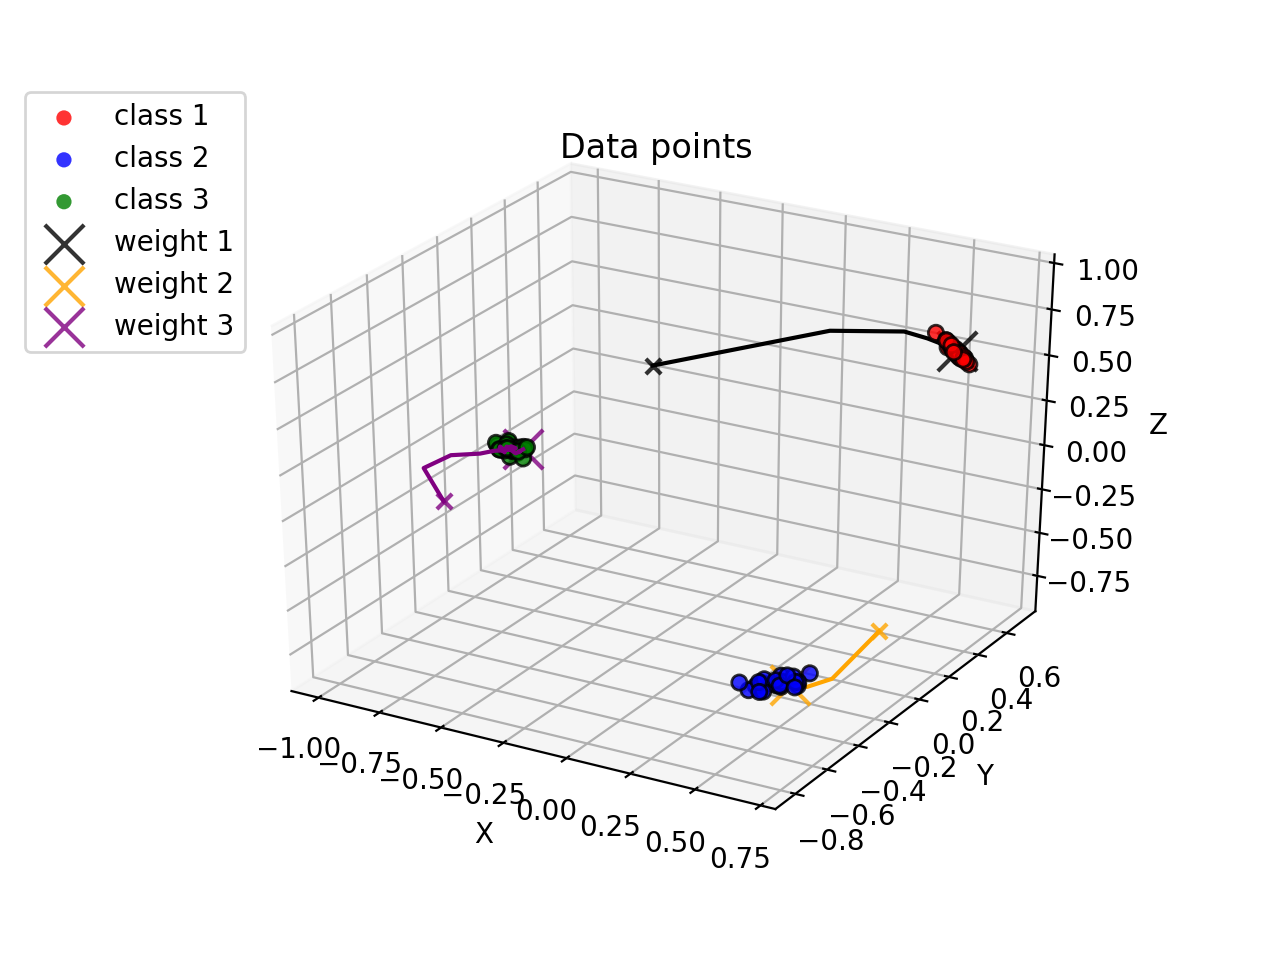

In [8]:
data = regions
colors = ("red", "blue" ,"green")
groups = ("class 1", "class 2", "class 3") 
 
fig = plt.figure()
ax = fig.gca(projection='3d')
 
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:,0], data[:,1], data[:,2],alpha=0.8, c=color, edgecolors='none', s=30, label=group)

initial_weights = (W_initial[0], W_initial[1], W_initial[2])
colors = ("black", "orange" ,"purple")
for weight, color in zip(initial_weights, colors):
    ax.scatter(weight[0], weight[1], weight[2] ,alpha=0.8, c=color, marker='x',edgecolors='none', s=30)
     
final_weights = (W[0], W[1], W[2])
colors = ("black", "orange" ,"purple")
groups = ("weight 1", "weight 2", "weight 3") 
for weight, color, group in zip(final_weights, colors, groups):
    ax.scatter(weight[0], weight[1], weight[2] ,alpha=0.8, c=color, marker='x',edgecolors='none', s=200, label=group)


for i in range(3):
    if len(W_path[i].shape)==1:
        W_path[i] = W_path[i].reshape((1,3))

ax.plot(xs=W_path[0][:,0], ys=W_path[0][:,1], zs=W_path[0][:,2], color='black')
ax.plot(xs=W_path[1][:,0], ys=W_path[1][:,1], zs=W_path[1][:,2], color='orange')
ax.plot(xs=W_path[2][:,0], ys=W_path[2][:,1], zs=W_path[2][:,2], color='purple')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Data points')
plt.legend(bbox_to_anchor=(0.1, 1.05))
plt.savefig('final.png')
plt.show()

# Testing

- Below you may see test results.
- Each cluster data will match with the corresponding weight vector.

In [9]:
X_test, _, _ = generate_data(size=2)

In [10]:
for idx, x in enumerate(X_test):
    distances = np.array([np.linalg.norm(x-w) for w in W])
    inds  = distances.argsort()
    closest = inds[0]
    print("Test point from cluster " + str(int(idx/2)+1) + " is matched with weight vector " + str(closest+1))

Test point from cluster 1 is matched with weight vector 1
Test point from cluster 1 is matched with weight vector 1
Test point from cluster 2 is matched with weight vector 2
Test point from cluster 2 is matched with weight vector 2
Test point from cluster 3 is matched with weight vector 3
Test point from cluster 3 is matched with weight vector 3


# Conclusion

- To conclude, I can say the model works well. Weight vectors converge to clusters and test results confirm this.
- Shuffled and nonshuffled data show different behaviors. You may check this.
- One problem of the model is that it heavily depends on the initial weights. Since the weights are randomly initialized, there is a possibility that a weight may be far away from each cluster. This dead unit does not move anywhere. This does not always happen but is possible.